# Tugas 6 Pengolahan Citra Digital

- Nama  = Michael Setiyanto Silambi
- NIM   = 1306620041
- Kelas = Fisika - A 2020
- Mata Kuliah = Pengolahan Citra Digital

1. Carilah suatu gambar (browsing)
2. Lakukan transformasi FFT
3. Plot FFT Spectrum dan Phase Spectrum
4. Transformasi Balik FFT
5. Buat Threshold divariasikan, lalu di transformasi balik

In [162]:
# Import Modul
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
from scipy import ndimage, misc
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
import cv2
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
# from scipy.stats import signaltonoise

import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

# Untuk Signaltonoise
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import numpy.fft
import timeit


# Nomor 1
Carilah suatu gambar (browsing)

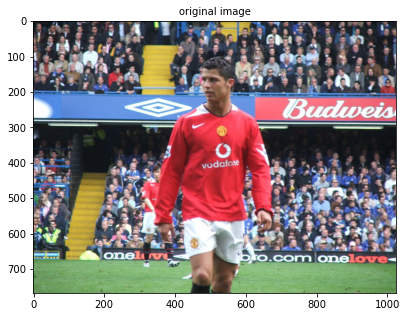

In [163]:
image = Image.open("7ronaldo.jpg") # input gambar
plt.figure(figsize=(15,5)) # size image
plt.title('original image', size=10) # title
plt.imshow(image) # menampilkan gambar
plt.show()

# Nomor 2
Lakukan transformasi FFT

C:\Users\hi\AppData\Local\Temp\ipykernel_14468\1935635345.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype('int'))


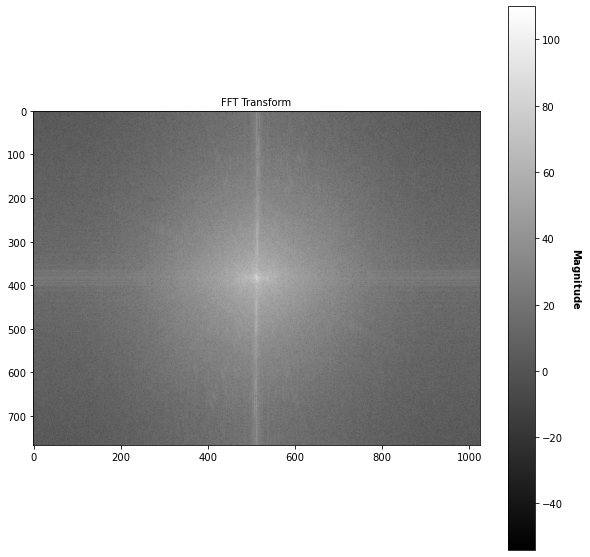

In [164]:
# Untuk gambar yang diubah ke grayscale
#image1 = np.array(Image.open("7ronaldo.jpg").convert('L')) # input gambar ke grayscale
image1 = rgb2gray(Image.open("7ronaldo.jpg"))

snr = signaltonoise(image1, axis=None)
#print('SNR for the original image = ' + str(snr))

# FFT dan IFFT
freq = fp.fft2(image1)

snr = signaltonoise(image1, axis=None)

freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype('int'))
pylab.title('FFT Transform', size=10)
#pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int), cmap='gray')
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel(r"$\bf{Magnitude}$",  labelpad=20, rotation=270)
pylab.show()


C:\Users\hi\AppData\Local\Temp\ipykernel_14468\3558446173.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype('int'))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


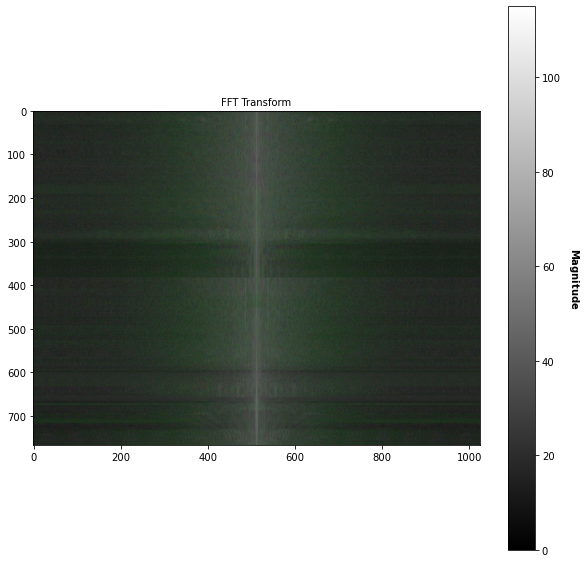

In [165]:
# Jika tidak diubah ke grayscale

image1 = Image.open("7ronaldo.jpg")

snr = signaltonoise(image1, axis=None)
#print('SNR for the original image = ' + str(snr))

# FFT dan IFFT
freq = fp.fft2(image1)

snr = signaltonoise(image1, axis=None)

freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype('int'))
pylab.title('FFT Transform', size=10)
#pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int), cmap='gray')
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel(r"$\bf{Magnitude}$",  labelpad=20, rotation=270)
pylab.show()


# Nomor 3
Plot FFT Spectrum dan Phase Spectrum

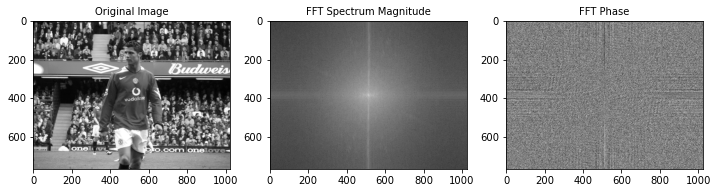

In [166]:
# Dalam grayscale
import numpy.fft as fp
image = Image.open("7ronaldo.jpg")
img1 = rgb2gray(image) # input gambar
pylab.figure(figsize=(12,10))
freq1 = fp.fft2(img1)

pylab.subplot(1,3,1), pylab.imshow(img1,cmap='gray'), pylab.title('Original Image', size=10)
pylab.subplot(1,3,2), pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))),cmap='gray')
                                                                  
pylab.title('FFT Spectrum Magnitude', size=10)
pylab.subplot(1,3,3), pylab.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
                                   
pylab.title('FFT Phase', size=10)
pylab.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


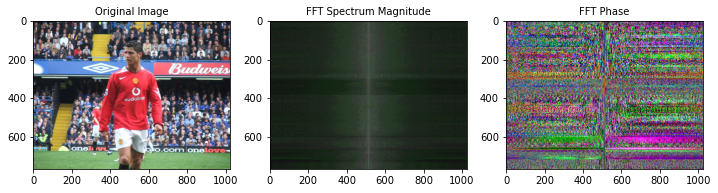

In [167]:
# Tidak dalam grayscale
import numpy.fft as fp
img2= Image.open("7ronaldo.jpg")
pylab.figure(figsize=(12,10))
freq2 = fp.fft2(img2)

pylab.subplot(1,3,1), pylab.imshow(img2,cmap='gray'), pylab.title('Original Image', size=10)
pylab.subplot(1,3,2), pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq2))).astype('int'))
                                                                  
pylab.title('FFT Spectrum Magnitude', size=10)
pylab.subplot(1,3,3), pylab.imshow(np.angle(fp.fftshift(freq2)))
                                   
pylab.title('FFT Phase', size=10)
pylab.show()

# Nomor 4
Transformasi Balik FFT

<class 'numpy.ndarray'>


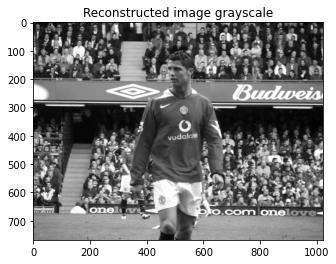

In [168]:
# Dalam grayscale
im1_ = fp.ifft2(freq1).real
print(type(im1_))
pylab.title('Reconstructed image grayscale')
pylab.imshow(np.clip(im1_,0,255),cmap='gray')


pylab.show()

<class 'numpy.ndarray'>


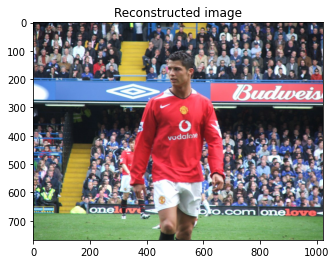

In [169]:
# Tetap RGB
im2_ = fp.ifft2(freq2).real
print(type(im2_))
pylab.title('Reconstructed image')
pylab.imshow(im2_.astype('int'))

pylab.show()

# Nomor 5
Buat Threshold divariasikan, lalu di transformasi balik

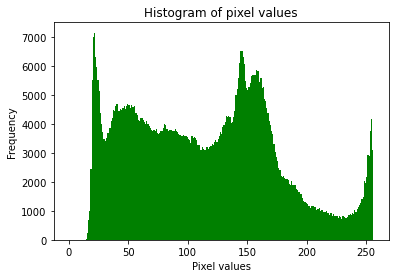

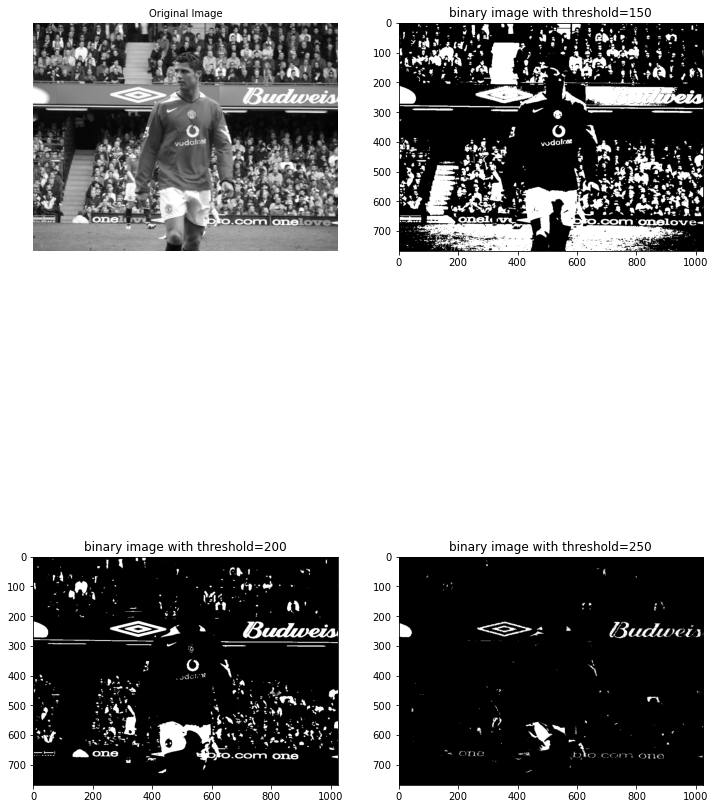

In [170]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

im = Image.open("7ronaldo.jpg").convert('L')
pylab.hist(np.array(im).ravel(), bins=256, range=(0, 256), color='g')
pylab.xlabel('Pixel values'), pylab.ylabel('Frequency'),
pylab.title('Histogram of pixel values')
pylab.show()
pylab.figure(figsize=(12,18))
pylab.gray()

# Original Image
pylab.subplot(221), pylab.title("Original Image", size = 10)
pylab.imshow(im), pylab.axis('off')

# Threshold
th = [0, 100, 150, 200, 250] # bagian threshold
for i in range(2, 5):
    im1 = im.point(lambda x: x > th[i])
    pylab.subplot(2,2,i)
    pylab.title('binary image with threshold=' + str(th[i]))
    pylab.imshow(im1,cmap='gray')
    
pylab.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


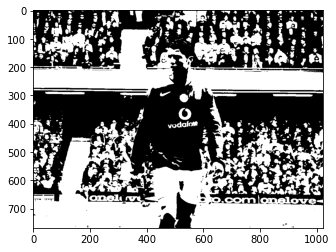

In [171]:
# Menggunakan skimage
from skimage.filters import threshold_otsu

dark_image = imread("7ronaldo.jpg")
image = rgb2gray(dark_image)
#image = Image.open("7ronaldo.jpg")
thresh = threshold_otsu(image)
binary = image > thresh # Binary lebih dari thresh
print(binary)

pylab.imshow(binary,cmap='gray')